In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

color = sns.color_palette()

import gc
import datetime

%matplotlib inline

In [6]:
data=pd.read_csv("AutoData.csv")

In [7]:
data

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [9]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
data.head(200)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,188.8,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0


##Tasks:
- Perform EDA on the data
- Perform data cleanup as required
- Pick the best variable for making a simple linear regression model
- Perform train test split
- Build model using best variable and report the R2
- Make a multiple regression model
- Apply feature selection approaches discussed in the class
- Final model should be interpretable
- hat is your understanding of the factors that drive price

In [13]:
data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
data.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [18]:
data['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [19]:
data ['aspiration'].astype('category').value_counts()


std      168
turbo     37
Name: aspiration, dtype: int64

In [23]:
data ['carbody'].astype('category').value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [24]:
data ['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [25]:
data ['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [30]:
data ['make'].astype('category').value_counts().head(147)

peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
toyota mark ii         3
                      ..
honda prelude          1
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
vw rabbit              1
Name: make, Length: 147, dtype: int64

In [31]:
data ['enginelocation'].astype('category').value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [32]:
data ['fueltype'].astype('category').value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [34]:
data ['carlength'].astype('category').value_counts()

157.3    15
188.8    11
171.7     7
166.3     7
186.7     7
         ..
177.3     1
178.2     1
178.4     1
178.5     1
208.1     1
Name: carlength, Length: 75, dtype: int64

In [35]:
data ['citympg'].astype('category').value_counts()

31    28
19    27
24    22
27    14
17    13
23    12
26    12
21     8
25     8
30     8
28     7
38     7
16     6
37     6
22     4
20     3
18     3
29     3
15     3
14     2
36     1
47     1
45     1
13     1
35     1
34     1
33     1
32     1
49     1
Name: citympg, dtype: int64

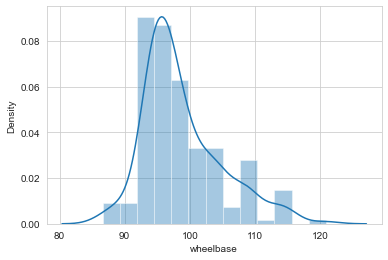

In [37]:
sns.distplot(data['wheelbase']);

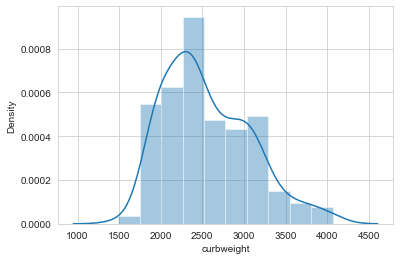

In [38]:
sns.distplot(data['curbweight']);

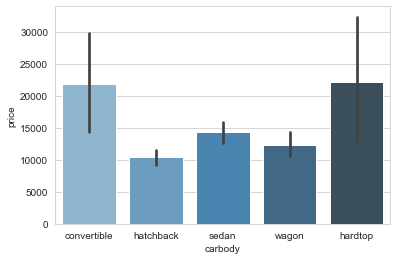

In [39]:
sns.barplot(x="carbody", y="price", data=data, palette="Blues_d");

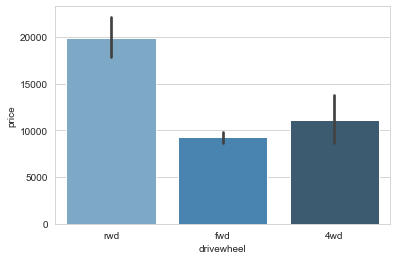

In [41]:
sns.barplot(x="drivewheel", y="price", data=data, palette="Blues_d");

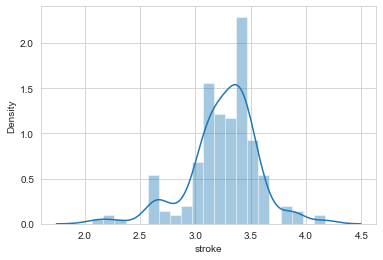

In [42]:
sns.distplot(data['stroke']);

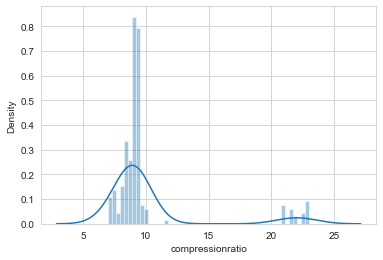

In [43]:
sns.distplot(data['compressionratio']);

In [44]:
data['mileage'] = data ['citympg']*0.55 + data ['highwaympg']*0.45

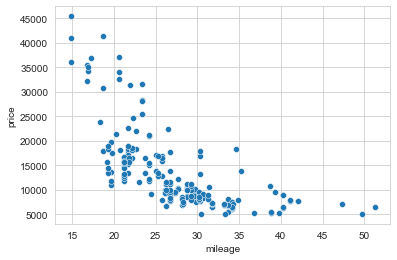

In [45]:
sns.scatterplot(x = 'mileage', y = 'price', data = data );

In [47]:
data.make.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [49]:
data ['brand'] = data.make.str.split(' ').str.get(0).str.upper()

In [50]:
len(set(data.brand.values))

27

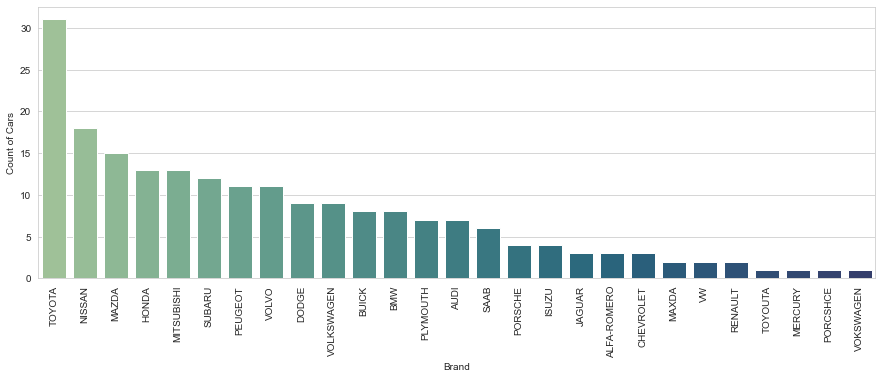

<Figure size 432x288 with 0 Axes>

In [51]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['brand'], order=pd.value_counts(data['brand']).index, palette = 'crest')
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [53]:
data['brand'] = data['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
data['brand'] = data['brand'].replace(['PORCSHCE'], 'PORSCHE')

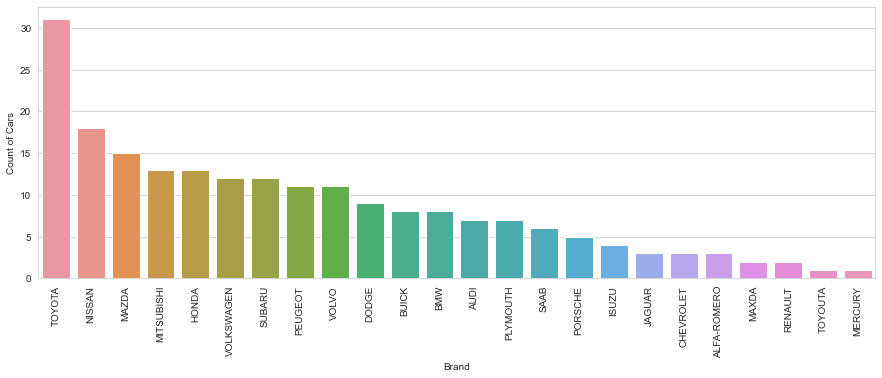

<Figure size 432x288 with 0 Axes>

In [54]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['brand'], order=pd.value_counts(data ['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [55]:
data.brand.describe()

count        205
unique        24
top       TOYOTA
freq          31
Name: brand, dtype: object

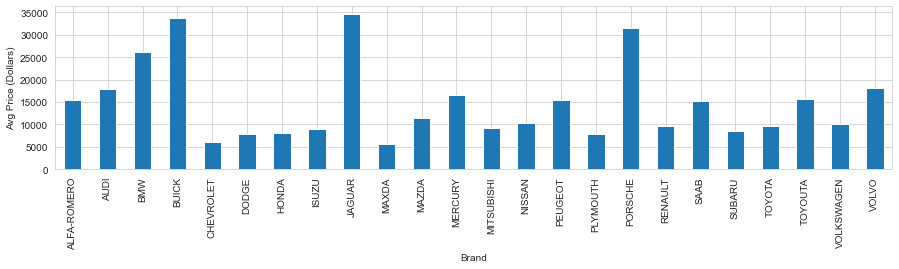

In [57]:
data_comp_avg_price = data[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 =data_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()


IN THE GIVEN FIG , ABOVE IT SHOWS AVG PRICE CAR OF EACH COMPANY.

In [59]:
data = data.merge(data_comp_avg_price, on = 'brand')

# COMPARE AVERAGE PRICE

In [60]:
data ['brand_category'] = data ['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

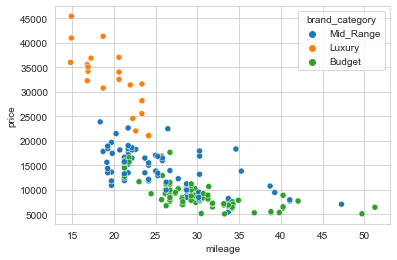

In [61]:
sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = data );

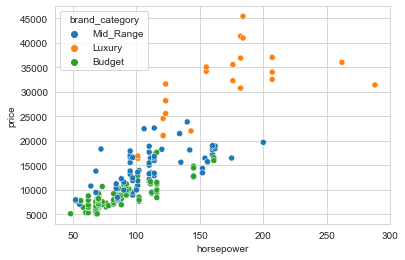

In [62]:
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data =data );

<AxesSubplot:xlabel='horsepower', ylabel='price'>

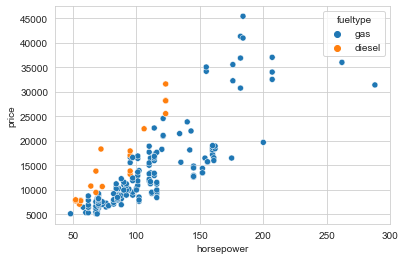

In [63]:
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = data )

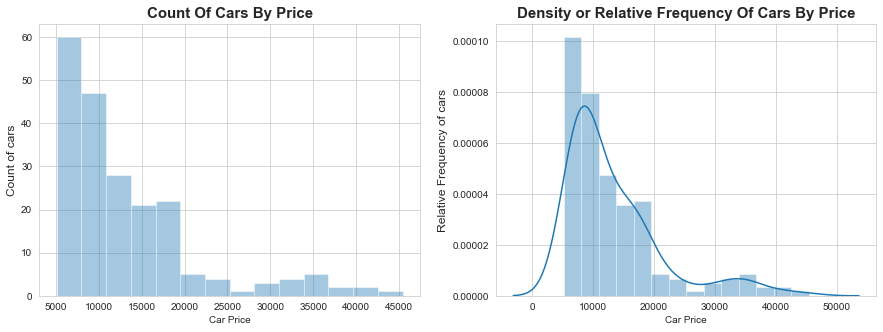

In [65]:
# target variable: price of car


fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(data['price'], norm_hist=False, kde=False, ax=ax[0])
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(data['price'], kde=True, ax=ax[1])
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold");

# Observations on Target Variable- Price:


The target variable price has a positive skew, however majority of the cars are low priced.


More than 50% of the cars (around 105-107 out of total of 205) are priced 10,000 and close to 35% cars are priced between 10,000 and 20,000. 

So around 85% of cars in US market are priced between 5,000 to 20,000.


Based on above observations and graph on right side (KDE/green one) it appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. (Notice the approximate bell curve
from little less than 30000 upto 45,000/50,000)


To perform linear regression, the target variable should be linearly related to independent variables. Let's see whether that's true in this case.


In [66]:
#creating df  with numeric var's only
data_numeric= data.select_dtypes(include=['float64','int64'])
data_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand_avg_price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,15498.333333
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,15498.333333
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,15498.333333
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,17859.166714
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,17859.166714


<Figure size 1440x720 with 0 Axes>

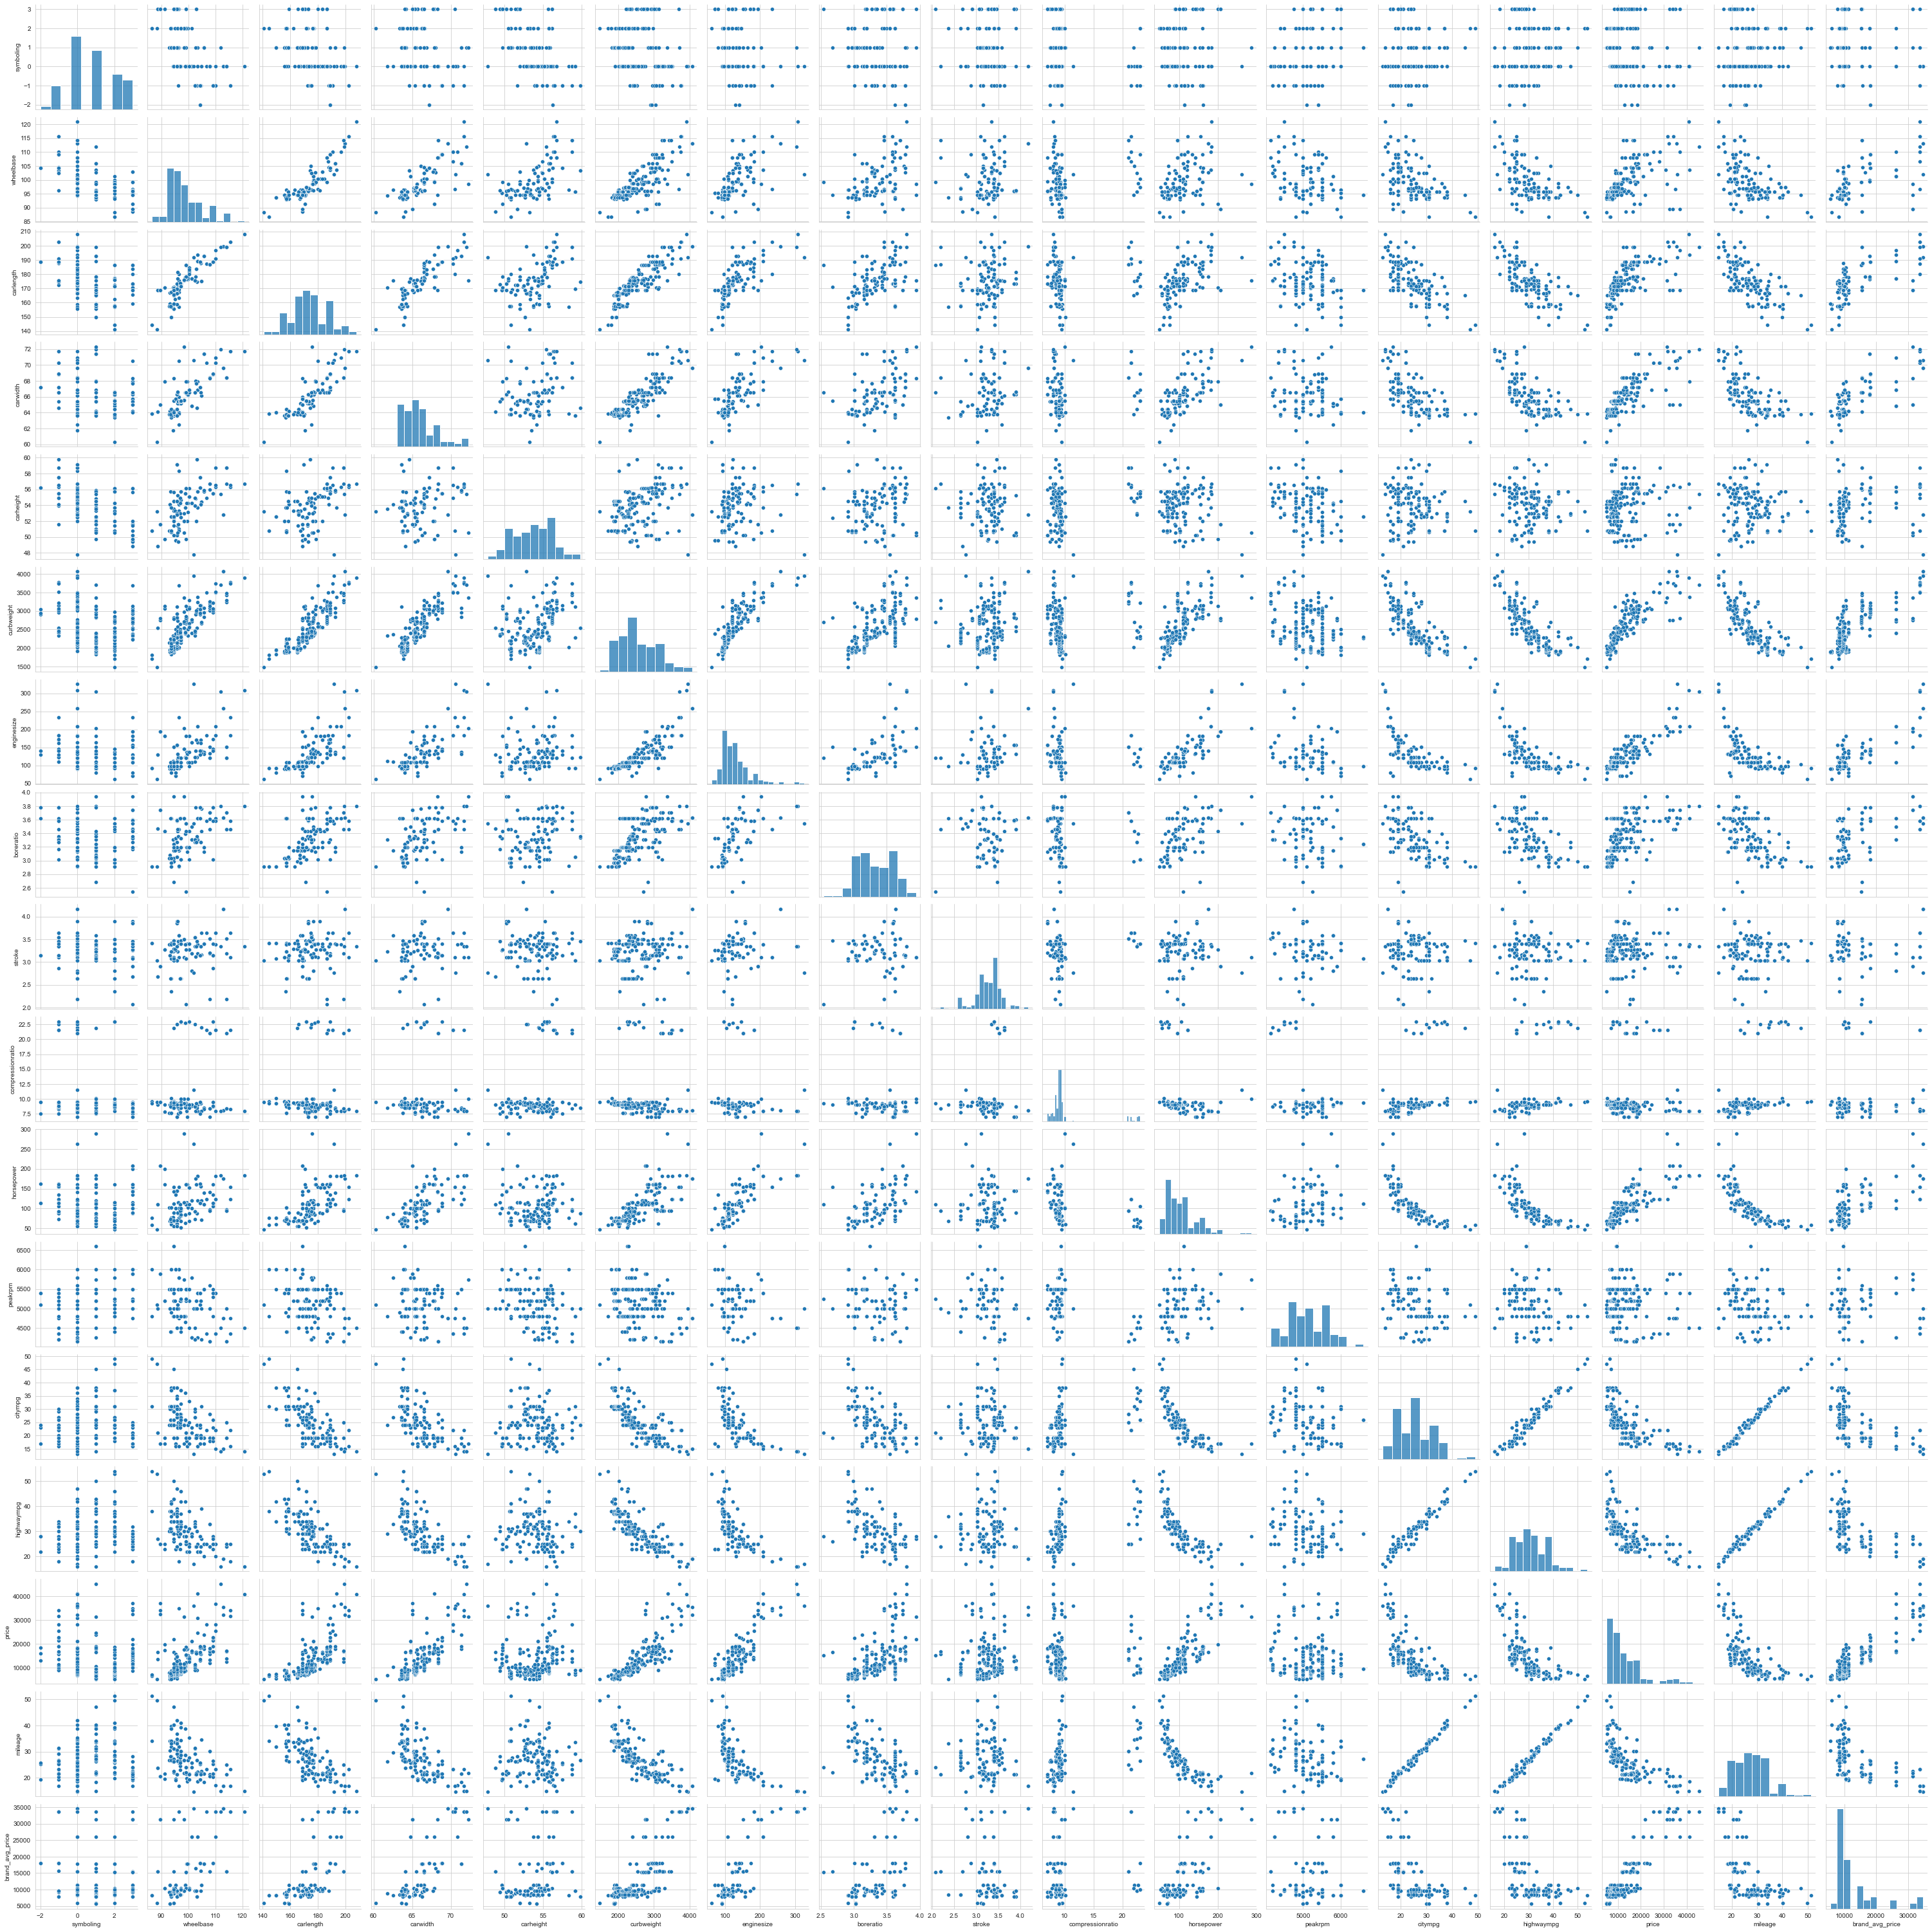

In [68]:
# paiwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric);

#as we can see its difficult to interpret these graphs due to somany of them
#a BETTER way of checking linearity is in below cell

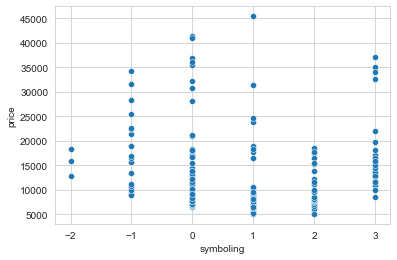

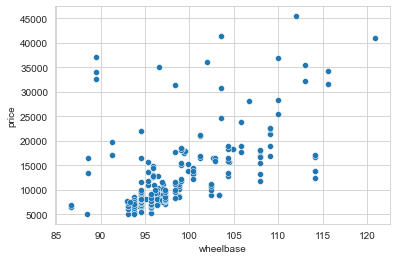

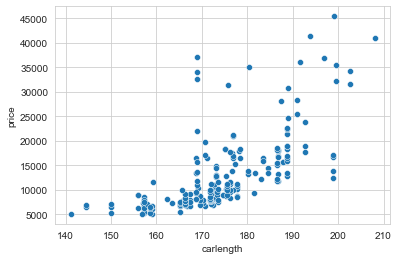

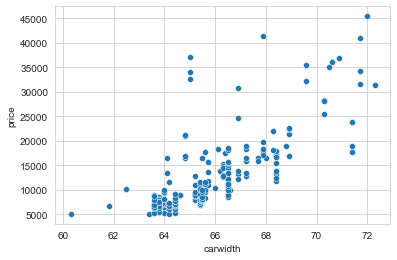

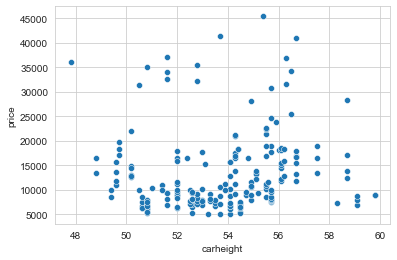

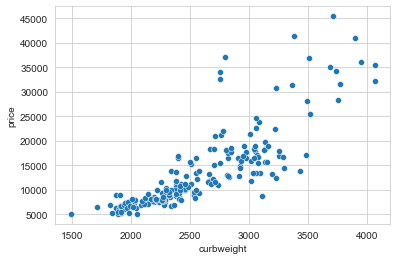

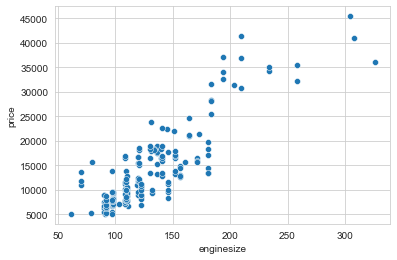

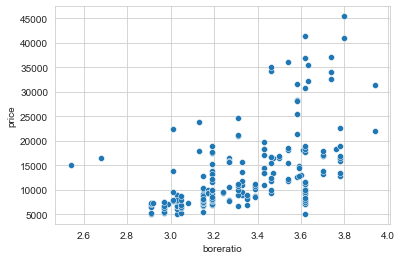

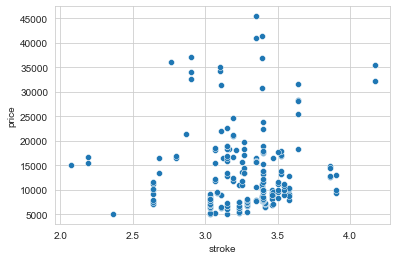

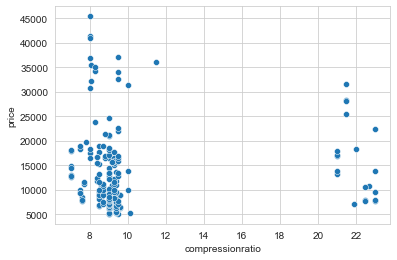

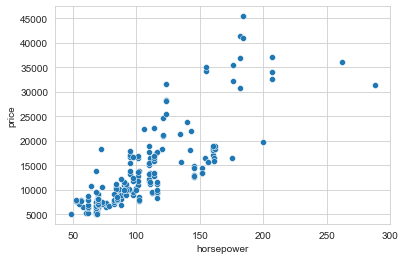

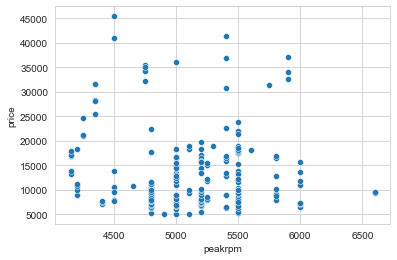

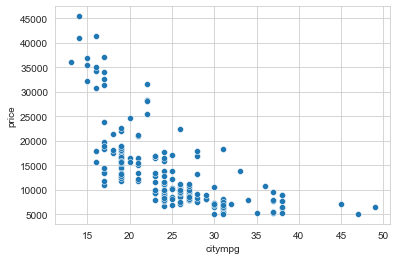

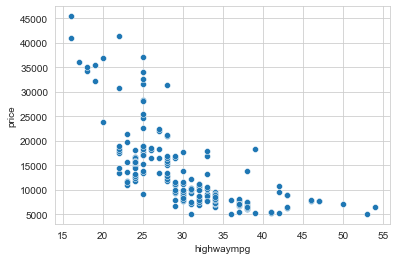

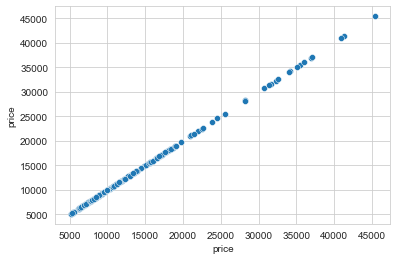

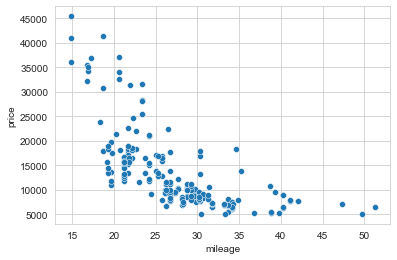

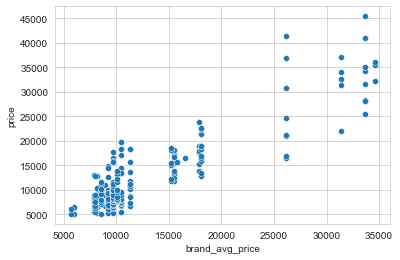

In [71]:
#LINEARITY CHECK>>> 

#To check price has linear relation or not with Indep. var's

for i, col in enumerate (data_numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=data_numeric[col],y=data_numeric['price'])

<AxesSubplot:>

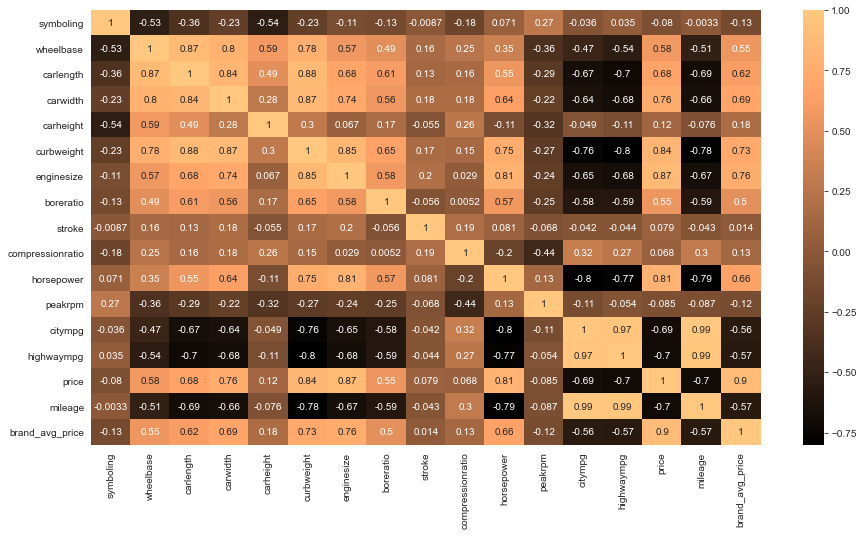

In [72]:
corr=data_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="copper")

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [74]:
# Converting symboling to categorical -
data ['symboling'] = data ['symboling'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [75]:
#Extracting car names. car name is the first word (before space)

make = data ['make'].apply(lambda x: x.split(" ")[0])
make[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: make, dtype: object

In [77]:
data['car_company']=make
data['car_company'].value_counts()

#Many car names are duplicates like toyota and toyouta, porsche and porcshce etc.
#We need to fix incorrect spelling and get carnames column in order.

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
porcshce        1
Nissan          1
toyouta         1
mercury         1
vokswagen       1
Name: car_company, dtype: int64

In [79]:
#volkswagen
data.loc[(data['car_company']=="vw")|(data['car_company']=="vokswagen"),"car_company"]="volkswagen"

#porsche

data.loc[(data['car_company']=="porcshce"),"car_company"]="porsche"

#toyota
data.loc[(data['car_company']=="toyouta"),"car_company"]="toyota"

# nissan
data.loc[data['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
data.loc[data['car_company'] == "maxda", 'car_company'] = 'mazda'

data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [80]:
##Drop carname variable

data = data.drop('make', axis=1)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [82]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand_avg_price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,27.708780,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,6.649183,7185.745886
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,14.800000,5645.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,21.950000,9239.769231
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,26.700000,10077.500000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,31.800000,15489.090909
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,51.250000,34600.000000


# Data Preparation: feature engineering

In [84]:
X=data.drop(columns=['price'])
y=data['price']

In [85]:
# creating dummy variables for categorical variables

data_categorical = X.select_dtypes(include=['object'])
data_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,brand_category,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,ALFA-ROMERO,Mid_Range,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,ALFA-ROMERO,Mid_Range,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,ALFA-ROMERO,Mid_Range,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,AUDI,Mid_Range,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,AUDI,Mid_Range,audi


In [86]:
#creating dummy variables


cars_dummies = pd.get_dummies(data_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X=X.drop(columns=data_categorical)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,mileage,brand_avg_price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.70,15498.333333
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.70,15498.333333
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,22.15,15498.333333
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,26.70,17859.166714
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,19.80,17859.166714


In [88]:
cars_dummies.columns

Index(['symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand_AUDI', 'brand_BMW',
       'brand_BUICK', 'brand_CHEVROLET', 'brand_DODGE', 'brand_HONDA',
       'brand_ISUZU', 'brand_JAGUAR', 'brand_MAXDA', 'brand_MAZDA',
       'brand_MERCURY', 'brand_MITSUBISHI', 'brand_NISSAN', 'brand_PEUGEOT',
       'brand_PLYMOUTH', 'brand_POR

In [89]:
dfX=pd.merge(X,cars_dummies,on=X.index)
dfX.columns

Index(['key_0', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'mileage',
       'brand_avg_price', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand_AUDI', 'brand_BMW',
       'brand_BUICK

In [90]:
dfX.drop(columns='key_0',inplace=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 95 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wheelbase                 205 non-null    float64
 1   carlength                 205 non-null    float64
 2   carwidth                  205 non-null    float64
 3   carheight                 205 non-null    float64
 4   curbweight                205 non-null    int64  
 5   enginesize                205 non-null    int64  
 6   boreratio                 205 non-null    float64
 7   stroke                    205 non-null    float64
 8   compressionratio          205 non-null    float64
 9   horsepower                205 non-null    int64  
 10  peakrpm                   205 non-null    int64  
 11  citympg                   205 non-null    int64  
 12  highwaympg                205 non-null    int64  
 13  mileage                   205 non-null    float64
 14  brand_avg_

# FEATURE SCALING -

In [91]:
#scaling features though not necessary in MLR but its good to do it as it makes interpretation of regression coefficients easier

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols=dfX.columns
dfX_scaled=pd.DataFrame(scale(dfX))
dfX_scaled.columns=cols
dfX_scaled.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'mileage', 'brand_avg_price',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand_AUDI', 'brand_BMW',
       'brand_BUICK', 'brand

In [92]:
dfX_scaled.describe()

#all numeric cols has means = 0 or as good as zero and std=1

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,...,-6.228080e-17,-4.947262e-16,-5.524037e-17,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-7.251652e-16,-6.452833e-16,3.552714e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
25%,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
50%,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
75%,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,...,-3.102526e-01,-2.381198e-01,-1.880254e-01,-1.581139e-01,-9.925833e-02,-1.736397e-01,-2.493515e-01,-4.300827e-01,-2.493515e-01,-2.381198e-01
max,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,...,3.223180e+00,4.199567e+00,5.318432e+00,6.324555e+00,1.007472e+01,5.759051e+00,4.010403e+00,2.325134e+00,4.010403e+00,4.199567e+00


In [93]:
#TRAINTEST - SPLIT 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX_scaled, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building and Feature Selection using RFE
Since our dependent variable price looks to be linearly related to most of the independent variables we are using Linear Regression only and not other types of regression like Polynomial, Random Forest/Boosting regression etc.

In [94]:
# Model with all features


from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [95]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.9758765127550096
R-sqaure on test data: 0.8261207602423586
RMSE on train data: 1208.3212938854545
RMSE on test data: 3489.499398443861


# Feature selection using RFE
Lets first decide optimal number of features rather than arbitarily specifying count of features to be used in model in the RFE function

In [96]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

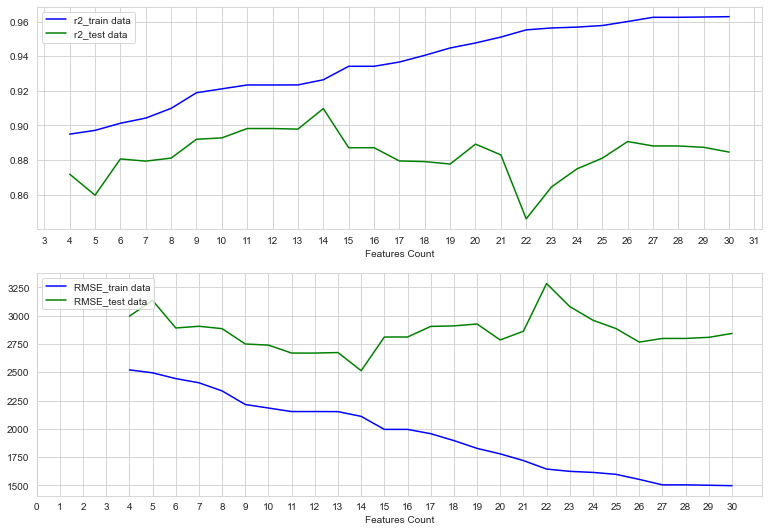

In [97]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))#method 2 of ticks

plt.show()

In [98]:
lm=LinearRegression()
rfe=RFE(lm,13)
rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_] #obtaining fetaure names of 12 most imp 

#making new Df's with  12 most imp features as per RFE algorithm
X_train_13= X_train[col]
X_test_13 = X_test[col]


# add a constant to the model
X_train_13 = sm.add_constant(X_train_13,has_constant='add')
X_test_13 = sm.add_constant(X_test_13,has_constant='add')


#fit OLS model
lm_sm=sm.OLS(y_train,X_train_13).fit()


#making predictions
y_pred_train=lm_sm.predict(X_train_13)
y_pred_test=lm_sm.predict(X_test_13)


#evlaution metrics

#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)

#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(lm_sm.summary())

----------------------R-sqaure-------------------------------------------
R-sq for test data is 0.8519004081832369
R-sq for train data is 0.9234573931124221
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 2674.244527956919
RMSE for train data is 2152.355524053719
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     130.7
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.32e-66
Time:                        16:28:42   Log-Likelihood:                -1300.3
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     130   BIC:                             2665.
Df Model:                          12        

# Below Graph also shows predictions are mostly close to Actual values

Text(0.5, 0, 'Index')

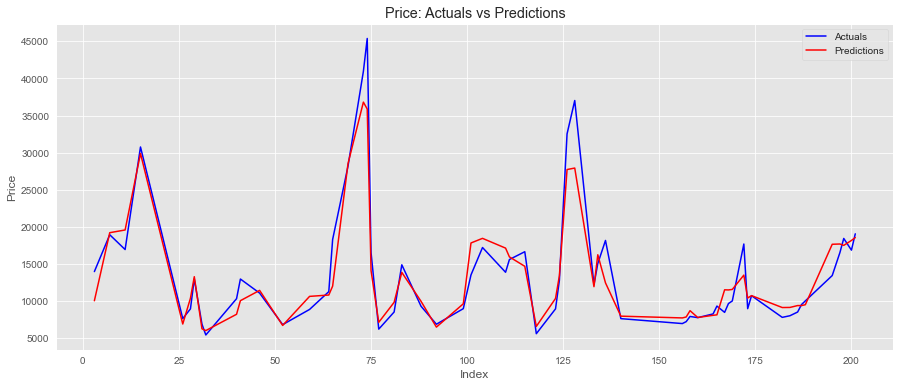

In [99]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')